# What is IForest behavior according to the dataset dimension size?

## Test with 1 dimension dataset

In [1]:
import sys
sys.path.append('../../../../../')
from datasets import datasets as datat
from IForest_DODiMDS import iforest_D as IFD
from metrics import performances
from metrics import visualization
visu = visualization.visualization()

import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

import matplotlib.cm as cm
from mpl_toolkits import mplot3d


## Generals settings

In [2]:
max_samples = 256
n_trees = 100
threshold = 0.6

## Chargement du jeu de données

In [3]:
dts = datat.synthetic_datasets(path_top="../../../../../")
X_brut, y_transform, full_dataset = dts.OneD_V1_1()
X_brut.describe()

Columns number = 2


,0
count,1516.000000
mean,0.032098
std,1.107025
min,-3.334118
25%,-0.692580
50%,-0.034028
75%,0.649778
max,6.867883


In [4]:
y_transform.describe()

,0
count,1516.000000
mean,0.980211
std,0.198020
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
y_transform

,0
0,1
1,1
2,1
3,1
4,1
...,...
1511,-1
1512,-1
1513,-1
1514,-1


## Execution of Iforest to get the best performance

In [6]:
roc_aucs = []
specificities = []
for i in range(10):
    # Instanciation, fit and predict
    func_IFD = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IFD.fit(X_brut)
    IFD_y_pred_IF, IFD_scores = func_IFD.predict(X=X_brut, threshold=threshold)

    # Matrice de confusion
    ttn, tfp, tfn, ttp = confusion_matrix(y_transform, IFD_y_pred_IF).ravel()
    print(confusion_matrix(y_transform, IFD_y_pred_IF))
    #ROC AUC
    roc_aucs.append(roc_auc_score(y_transform, IFD_y_pred_IF))
    # Specificity
    specificities.append(specificity_score(y_transform, IFD_y_pred_IF))
print("ROC AUC")
print(roc_aucs)
print("Specificities")
print(specificities)
min_roc_auc = max(roc_aucs)
print("min_roc_auc = "+str(min_roc_auc))

[[  15    0]
 [ 128 1373]]
[[  15    0]
 [ 113 1388]]
[[  15    0]
 [ 119 1382]]
[[  15    0]
 [ 100 1401]]
[[  15    0]
 [ 109 1392]]
[[  15    0]
 [ 107 1394]]
[[  15    0]
 [ 111 1390]]
[[  15    0]
 [ 115 1386]]
[[  15    0]
 [ 120 1381]]
[[  15    0]
 [  99 1402]]
ROC AUC
[0.9573617588274483, 0.9623584277148567, 0.9603597601598934, 0.9666888740839441, 0.963690872751499, 0.9643570952698202, 0.9630246502331778, 0.9616922051965356, 0.9600266489007329, 0.9670219853431046]
Specificities
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
min_roc_auc = 0.9670219853431046


In [7]:
(119/(119+1382))*100

7.928047968021319

In [8]:
roc_auc_IF = []
max_samples_IF = []

for j in range(5, len(X_brut), 5):
    print("max_samples = "+str(j))
    max_samples = j
    # Instanciation, fit and predict
    func_IF = IFD.IsolationForest(sample_size = max_samples, n_trees=n_trees)
    func_IF.fit(X_brut)
    y_pred_IF, scores = func_IF.predict(X=X_brut, threshold=threshold)
    print(confusion_matrix(y_transform, y_pred_IF))

    auc_IF = roc_auc_score(y_transform, y_pred_IF)
    if auc_IF >= min_roc_auc:
        print("auc_IF = "+str(auc_IF))
        roc_auc_IF.append(auc_IF)
        max_samples_IF.append(j)

max_samples = 5
[[  15    0]
 [1501    0]]
max_samples = 10
[[  15    0]
 [1501    0]]
max_samples = 15
[[  15    0]
 [1501    0]]
max_samples = 20
[[  15    0]
 [1501    0]]
max_samples = 25
[[  15    0]
 [1501    0]]
max_samples = 30
[[  15    0]
 [1501    0]]
max_samples = 35
[[  15    0]
 [1501    0]]
max_samples = 40
[[  15    0]
 [1501    0]]
max_samples = 45
[[  15    0]
 [1501    0]]
max_samples = 50
[[  15    0]
 [1501    0]]
max_samples = 55
[[  15    0]
 [1501    0]]
max_samples = 60
[[  15    0]
 [1501    0]]
max_samples = 65
[[ 15   0]
 [933 568]]
max_samples = 70
[[ 15   0]
 [780 721]]
max_samples = 75
[[ 15   0]
 [728 773]]
max_samples = 80
[[ 15   0]
 [566 935]]
max_samples = 85
[[ 15   0]
 [538 963]]
max_samples = 90
[[ 15   0]
 [541 960]]
max_samples = 95
[[ 15   0]
 [515 986]]
max_samples = 100
[[  15    0]
 [ 396 1105]]
max_samples = 105
[[  15    0]
 [ 344 1157]]
max_samples = 110
[[  15    0]
 [ 338 1163]]
max_samples = 115
[[  15    0]
 [ 384 1117]]
max_samples =

[[  15    0]
 [  33 1468]]
auc_IF = 0.9890073284477015
max_samples = 680
[[  15    0]
 [  32 1469]]
auc_IF = 0.9893404397068621
max_samples = 685
[[  15    0]
 [  25 1476]]
auc_IF = 0.9916722185209861
max_samples = 690
[[  15    0]
 [  33 1468]]
auc_IF = 0.9890073284477015
max_samples = 695
[[  15    0]
 [  28 1473]]
auc_IF = 0.9906728847435043
max_samples = 700
[[  15    0]
 [  23 1478]]
auc_IF = 0.9923384410393071
max_samples = 705
[[  15    0]
 [  33 1468]]
auc_IF = 0.9890073284477015
max_samples = 710
[[  15    0]
 [  25 1476]]
auc_IF = 0.9916722185209861
max_samples = 715
[[  15    0]
 [  35 1466]]
auc_IF = 0.9883411059293804
max_samples = 720
[[  15    0]
 [  23 1478]]
auc_IF = 0.9923384410393071
max_samples = 725
[[  15    0]
 [  31 1470]]
auc_IF = 0.9896735509660226
max_samples = 730
[[  15    0]
 [  18 1483]]
auc_IF = 0.9940039973351099
max_samples = 735
[[  15    0]
 [  30 1471]]
auc_IF = 0.9900066622251832
max_samples = 740
[[  15    0]
 [  19 1482]]
auc_IF = 0.9936708860759

[[  15    0]
 [  12 1489]]
auc_IF = 0.9960026648900733
max_samples = 1240
[[  15    0]
 [  10 1491]]
auc_IF = 0.9966688874083944
max_samples = 1245
[[  15    0]
 [  11 1490]]
auc_IF = 0.9963357761492339
max_samples = 1250
[[  15    0]
 [   9 1492]]
auc_IF = 0.9970019986675549
max_samples = 1255
[[  15    0]
 [  10 1491]]
auc_IF = 0.9966688874083944
max_samples = 1260
[[  15    0]
 [  10 1491]]
auc_IF = 0.9966688874083944
max_samples = 1265
[[  15    0]
 [  11 1490]]
auc_IF = 0.9963357761492339
max_samples = 1270
[[  15    0]
 [   9 1492]]
auc_IF = 0.9970019986675549
max_samples = 1275
[[  15    0]
 [   9 1492]]
auc_IF = 0.9970019986675549
max_samples = 1280
[[  15    0]
 [  10 1491]]
auc_IF = 0.9966688874083944
max_samples = 1285
[[  15    0]
 [  10 1491]]
auc_IF = 0.9966688874083944
max_samples = 1290
[[  15    0]
 [   9 1492]]
auc_IF = 0.9970019986675549
max_samples = 1295
[[  15    0]
 [   8 1493]]
auc_IF = 0.9973351099267156
max_samples = 1300
[[  15    0]
 [   9 1492]]
auc_IF = 0.

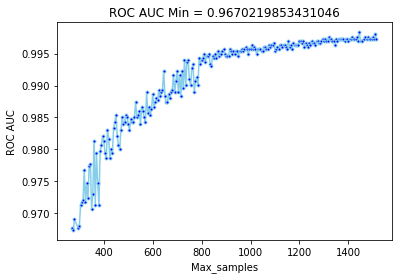

In [9]:
#plt.plot(max_samples_IF, roc_auc_IF,  "b-", marker='.', markerfacecolor='blue', markersize=6, color='skyblue')
#plt.title("ROC AUC Min = "+str(min_roc_auc))
#plt.axis([0, 1, 0, 1])
#plt.xlabel('Max_samples')
#plt.ylabel('ROC AUC')
#plt.show()
visu.plot_2D(max_samples_IF, roc_auc_IF,'Max_samples', 'ROC AUC', "ROC AUC Min = "+str(min_roc_auc), link="b").show()

## Conclusion

- IForest arrive à détecter toutes les anomalies mais le taux de fausses alertes reste quand même élevé (environ 8%) pour les paramètres suivants : max_samples = 256, n_trees = 100, threshold = 0.5. Et ce taux de fausses alertes pourrait augmenter en fonction de la taille du jeu de données total.
Alors la question qui se pose est "Comment faire pour minimiser le taux de fausses alertes tout en conservant une bonne spécificité?"

- L'hypothèse selon laquelle la performance de IForest est fonction du nombre de données dans l'échantillon et par ricochet la taille maximale de l'arbre est vérifié car, on remarque que plus la taille de l'échantillon augmente, plus la AUC est meilleure même si on maintient n_trees = 100, threshold = 0.5 Ce qu'il y a lieu de faire est de vérifier:

    - si cette amélioration est dû au nombre de données anormales qui se retrouve dans l'échantillon ou si c'est dû uniquement à la taille de l'arbre
    - le rapport entre la taille de l'échantillon et le nombre d'arbres qu'il faut pour obtenir une bonne performance
    - le seuil à choisir dépend t-il d'un paramètre?
    - que faire quand les anomalies se ressemblent tellement qu'elles se retrouvent aussi au pied de l'arbre
    - si les noeuds feuilles de chaque arbre de la forêt ainsi créée contient des données anormales.